In [ ]:

#                                 SOLUCIÓN TEMPORAL
#                                       DE LA
#                              ECUACIÓN DE SCHRÖDINGER
#                            ===========================


#Librerías:
#Para los cálculos
import numpy as np
from scipy.interpolate import CubicSpline

#Para los gráficos
import matplotlib.pyplot as plt

#Para animar
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

#Para el problema voluntario
import random as rand

In [ ]:
#                                FUNCIONES ÚTILES
#                              ====================


def k_j(i):
  k__j = 1j*2*h**2/s-h**2*V[i]-2
  return k__j


def norma(psi,a,b): #Calcula la norma de la función de onda en un momento dado (sqrt(|psi|^2))
  integral = 0
  for j in np.arange(np.argmin(np.absolute(x-a)),np.argmin(np.absolute(x-b))):
    integral = integral + np.real(np.conjugate(psi[j])*psi[j])*h
  #norm = np.sqrt(integral)
  norm = integral
  return norm


def altura_barrera(param,k_0):
  A = param*k_0**2
  return A

#función evolución temporal
def U(in_func,nT): #"in_func" = función inicial
                   #"nT" = número de pasos que va hacer evolucionar la función
  #Establecemos la condición inicial
  psi = in_func
  #(1.1) Creamos un array con los k_j (k)
  k = np.zeros(N,dtype=complex)
  for i in np.arange(0,N):
    k[i] = k_j(i)
  #(1.1) Creamos un array que contenga los k'_j (kk)
  kk = np.zeros(N,dtype=complex)
  kk[0] = k[0]
  for i in np.arange(1,N):
    kk[i] = k[i]-1/kk[i-1]

  #Evolución temporal
  for n in np.arange(1,nT):
    #(1) Calculamos los ji[j,n]
    #(1.2) Calculamos los phi'_j y los guardamos en un array (ppsi)
    ppsi = np.zeros(N,dtype=complex)
    ppsi[0] = (4j*h**2/s)*psi[0]
    for i in np.arange(1,N-1):
      ppsi[i] = (4j*h**2/s)*psi[i]-ppsi[i-1]/kk[i-1]
    #(1.3) Calculamos propiamente los ji
    ji = np.zeros(N,dtype=complex)
    for i in np.arange(N-2,0,-1):
      ji[i] = (ppsi[i]-ji[i+1])/kk[i]
    #(2) Calculamos el siguiente paso temporal
    psi = ji-psi
  return psi



/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


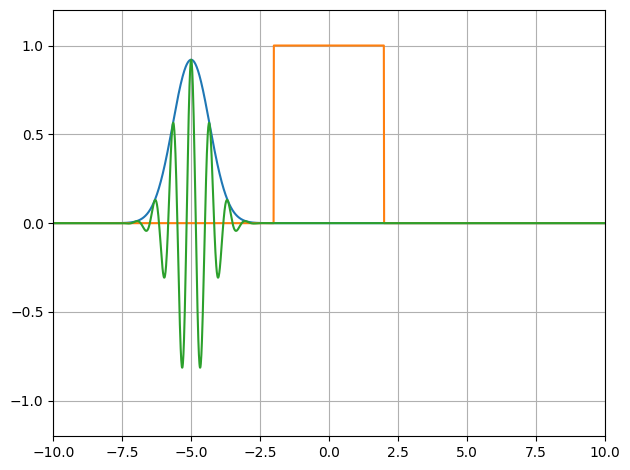

In [ ]:

#                            CONFIGURACIÓN INICIAL
#                           -----------------------


#PARÁMETROS MANIPULABLES:
#Número de puntos
N = 2000

#Param es la relación entre la energía de la barrera y la de la partícula
param = 0.8

#Número de ciclos (Momento inicial)
n_ciclos = 30

#Rango de representación en x
x_min = -10
x_max = +10

D = x_max - x_min

#Tiempo de la simulación
T = 0.8






#VARIABLES DETERMINADAS
#Intervalo espacial
h = D/N

#Posiciones
x = np.arange(x_min,x_max,h)

#Momento inicial
k_0 = 2*np.pi*n_ciclos/D
if n_ciclos > N/4:
  print("Error: el número de ciclos es mayor a N/4")

#Intervalo temporal
#s = 1/(1*k_0**2)
s = 0.001

#Número de puntos M temporales
M = int(T/s+1)

#Posición incial del centro del paquete
x_0 = -5

#Anchura inicial del paquete
sigma = 20/30




#FUNCIÓN DE ONDA INICIAL:
psi = np.array([],dtype=complex)
psi = np.exp(-(x-x_0)**2/(2*sigma**2))*np.exp(1j*k_0*(x-x_0))
psi = psi/np.sqrt(norma(psi,x_min,x_max))
"""
psi = np.zeros(N)
psi[np.argmin(abs(x-(-15)))] = 1
"""

#POTENCIALES:
V = np.array([],dtype=complex)

#(1) Sin potencial
#V = x*0

#(2) armónico
#V = x**2

#(3) Barrera de potencial

#Longitud de la barrera
L = 4
#Altura de la barrera
A = altura_barrera(param,k_0)
#Posición del centro de la barrera
x_barrera = 0

V1 = np.zeros((int((x_barrera-L/2-x_min)/h),),dtype=complex)
V2 = +A*np.ones((int(L/h),),dtype=complex)
Q = N-len(V1)-len(V2)
V3 = np.zeros((Q,),dtype=complex)

V = np.append(V,V1)
V = np.append(V,V2)
V = np.append(V,V3)


#(4) Potencial random
"""A = 0.001
V = A*(x-15)*(x**2)*(x+15)"""

#(5) Potencial central
"""
A=30
V = A*(2/x**2-2/x)
"""



#Representación de la configuración inicial

plt.grid()
#plt.plot(x,np.sqrt(psi*np.conjugate(psi)),"-",x,V/(A*2),x,np.real(psi))
#Para potencianles que no son barrera de potencial
plt.plot(x,np.sqrt(psi*np.conjugate(psi)),"-")
plt.plot(x,V/A)
plt.plot(x,np.real(psi))
plt.xlim(x_min,x_max)
plt.ylim(-1.2,1.2)
plt.tight_layout()

In [ ]:
psi_nD = U(psi,M)

PD = np.sqrt(norma(psi_nD,x_barrera+L/2,x_max))
print(PD)

9.289749189109102e-08


In [ ]:
#                               COEFICIENTE DE TRANSMISIÓN
#                              ============================

#                                       ALGORITMO



N_sim = 1e3     #Número de simulaciones
nD = M          #Número de pasos temporales de la simulación
mT = 0          #Contador del número de trasmisiones
contador = 0
it = 0

#(1)Genera la función de onda inicial
psi_0 = psi

for i in np.arange(0,N_sim):
  #print("Simulación",i)
  contador = 0
  it = 0
  while contador == 0:
    #print("Iteración",it)
    it = it + 1
    #(2)Evoluciona nD pasos
    psi_nD = U(psi_0,nD)
    #(3)Calcula PD
    PD = np.sqrt(norma(psi_nD,x_barrera+L/2,x_max))
    #(4)Generar un número aleatorio x. Si x < PD aumentar mT e ir a 1.
    randnum01 = rand.random()
    if randnum01 < PD:
      #print("Se detectó a la derecha")
      #print(" ")
      mT = mT+1
      contador = 1
      #(1)Genera la función de onda inicial
      psi_0 = np.exp(-(x-x_0)**2/(2*sigma**2))*np.exp(1j*k_0*(x-x_0))
      psi_0 = psi_0/np.sqrt(norma(psi_0,x_min,x_max))
      continue
    #(5)Hacer psi_T[4N/5:N,nD] = 0, calcular norma(psi_T[:,nD])
    #y normalizar la función de onda
    psi_nD[np.argmin(abs(x-(x_barrera+L/2))):] = 0
    psi_nD = psi_nD/np.sqrt(norma(psi_nD,x_min,x_max))
    #(6)Calcular PI
    PI = np.sqrt(norma(psi_nD,x_min,x_barrera-L/2))
    #(7)Generar un número aleatorio x. Si x < PI ir a 1.
    randnum02 = rand.random()
    if randnum02 < PI:
      #print("Se detectó a la izquierda")
      #print(" ")
      contador = 1
      #(1)Genera la función de onda inicial
      psi_0 = np.exp(-(x-x_0)**2/(2*sigma**2))*np.exp(1j*k_0*(x-x_0))
      psi_0 = psi_0/np.sqrt(norma(psi_0,x_min,x_max))
      continue
    #(8) Hacer psi_T[0:N/5,nD] = 0, calcular norma(psi_T[:,nD])
    #y normalizar la función de onda
    psi_nD[:np.argmin(abs(x-(x_barrera-L/2)))] = 0
    psi_nD = psi_nD/np.sqrt(norma(psi_nD,x_min,x_max))
    #print("No se detectó")
    #(9) Ir a 2

In [ ]:
k=mT/N_sim
print(k)

0.439


In [ ]:
#                                    ANIMACIÓN
#                              ====================


#Tiempo de la animación:
T_anim =  20 #(s)
num_fps = 25
num_frames = T_anim*num_fps

coef_prop = int(M/num_frames)


#Array temporal
psi_T=np.zeros((N,M),dtype=complex)

#Establecemos la condición inicial
psi_T[:,0] = psi

#Los k_j y k'_j no cambian, por eso se calculan fuera del bucle
#(1.1) Creamos un array con los k_j (k)
k = np.zeros(N,dtype=complex)
for i in np.arange(0,N):
  k[i] = k_j(i)
#(1.1) Creamos un array que contenga los k'_j (kk)
kk = np.zeros(N,dtype=complex)
kk[0] = k[0]
for i in np.arange(1,N):
  kk[i] = k[i]-1/kk[i-1]

for n in np.arange(1,M):
  #(1) Calculamos los ji[j,n]

  #(1.2) Calculamos los phi'_j y los guardamos en un array (ppsi)
  ppsi = np.zeros(N,dtype=complex)
  ppsi[0] = (4j*h**2/s)*psi_T[0,n-1]
  for i in np.arange(1,N-1):
    ppsi[i] = (4j*h**2/s)*psi_T[i,n-1]-ppsi[i-1]/kk[i-1]

  #(1.3) Calculamos propiamente los ji
  ji = np.zeros(N,dtype=complex)
  for i in np.arange(N-2,0,-1):
    ji[i] = (ppsi[i]-ji[i+1])/kk[i]


  #(2) Calculamos el siguiente paso temporal
  psi_T[:,n] = ji[:]-psi_T[:,n-1]


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Evolución temporal de la función de onda.\n Instante t = 0.4')

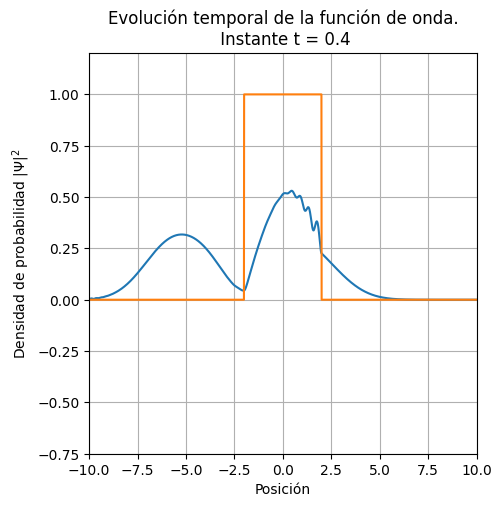

In [ ]:
#Representación de la configuración final
t=int((M-1)*0.5)

fig1, ax1 = plt.subplots(figsize=(5,5.2))

plt.grid()
#plt.plot(x,np.sqrt(psi_T[:,t]*np.conjugate(psi_T[:,t])),x,V/(A*2))
plt.plot(x,np.sqrt(psi_T[:,t]*np.conjugate(psi_T[:,t])),x,V/A)
plt.xlim(x_min,x_max)
plt.ylim(-0.75,1.2)
plt.xlabel("Posición")
plt.ylabel("Densidad de probabilidad $|\Psi|^2$")
plt.title(f"Evolución temporal de la función de onda.\n Instante t = {round(t*s,2)}")


In [ ]:
#Definimos una función que crea un frame de la animación

fig, ax = plt.subplots(figsize=(5,5.2))


def animate(i):
    i = coef_prop*i
    ax.clear()
    ax.plot(x,np.sqrt(psi_T[:,i]*np.conjugate(psi_T[:,i])),"-")
    #ax.plot(x,V/(A*2))
    ax.plot(x,V/A)
    # Establecemos los límites de la representación
    ax.grid()
    ax.set_xlim([x_min,x_max])
    ax.set_ylim([-0.6,1.2])
    ax.set_xlabel("Posición")
    ax.set_ylabel("Densidad de probabilidad $|\Psi|^2$")
    ax.set_title(f"Evolución temporal de la función de onda.\n Instante t = {round(i*s,2)}")

ani = FuncAnimation(fig, animate, frames=num_frames,
                    interval=int(10e3/num_fps), repeat=False)
plt.close()



In [ ]:
#Esta función de matplot guarda el GIF

ani.save(f"V(x)=pozo;Altura={round(A,2)};Ancho={round(L,2)};T={T}.gif", dpi=120, writer=PillowWriter(fps=num_fps))

#ani.save(f"V(x)=potencial_central.gif", dpi=300,writer=PillowWriter(fps=num_fps))

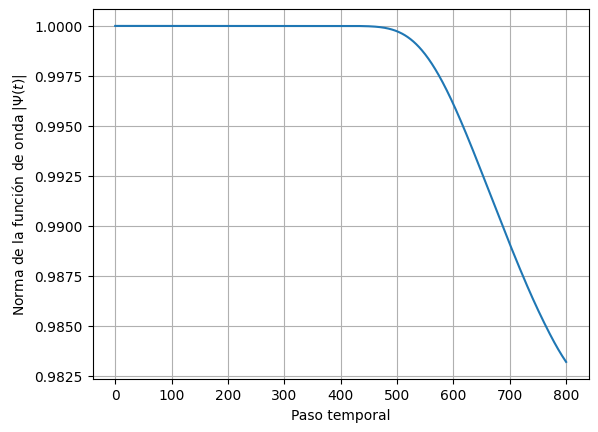

In [ ]:
#                                CONSERVACIÓN DE LA NORMA
#                               ==========================

norma_T = np.zeros(M)
for t in np.arange(0,M):
  norma_T[t] = norma(psi_T[:,t],x_min,x_max)

t_arr = np.arange(0,M)

plt.plot(t_arr,norma_T)
plt.ylabel("Norma de la función de onda $|\Psi(t)|$")
plt.xlabel("Paso temporal")
#plt.ylim(0.999,1.001)
plt.grid()

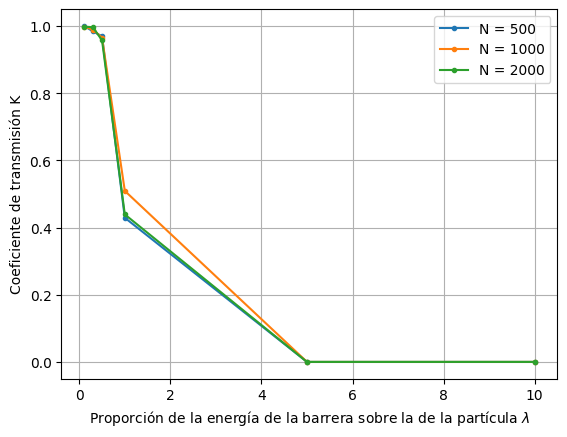

In [ ]:
K = np.array([[1.000,0.984,0.969,0.429,0.000,0.000],
             [0.998,0.989,0.965,0.509,0.000,0.000],
             [0.998,0.996,0.957,0.439,0.000,0.000]])

Lambda = np.array([0.1,0.3,0.5,1,5,10])


plt.grid()
plt.plot(Lambda,K[0,:],".-",Lambda,K[1,:],".-",Lambda,K[2,:],".-")

plt.ylabel("Coeficiente de transmisión K")
plt.xlabel("Proporción de la energía de la barrera sobre la de la partícula $\lambda$")

plt.legend(("N = 500","N = 1000","N = 2000"))
